One minute data unlocked

Average voltage: 0.980 V
First 10 frequency bins and ASD values:
0.00 Hz -> 1.055e-05 1/sqrt(Hz)
0.98 Hz -> 5.603e-05 1/sqrt(Hz)
1.95 Hz -> 1.884e-05 1/sqrt(Hz)
2.93 Hz -> 1.280e-05 1/sqrt(Hz)
3.91 Hz -> 1.056e-05 1/sqrt(Hz)
4.88 Hz -> 9.763e-06 1/sqrt(Hz)
5.86 Hz -> 9.757e-06 1/sqrt(Hz)
6.84 Hz -> 9.078e-06 1/sqrt(Hz)
7.81 Hz -> 8.660e-06 1/sqrt(Hz)
8.79 Hz -> 8.446e-06 1/sqrt(Hz)


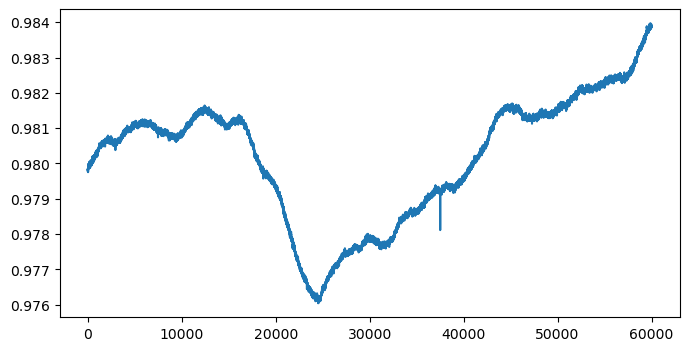

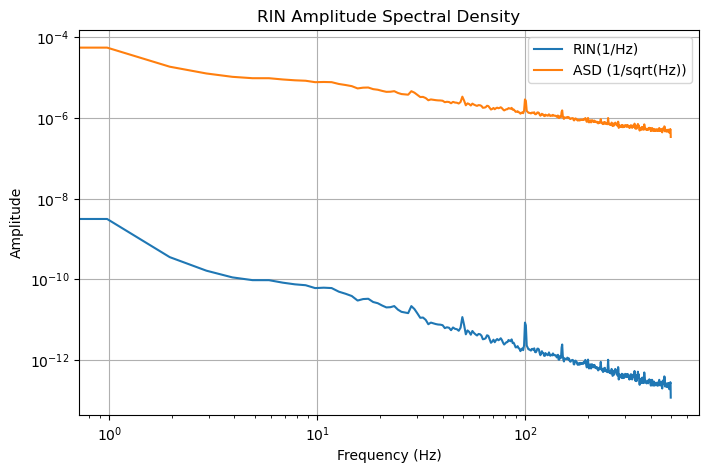

In [ ]:

import numpy as np
from scipy.signal import welch
import matplotlib.pyplot as plt

usignal = np.fromfile('C:\Users\hodei\Documents\RINbin_data\mephistopsl_rin60unlocked.bin', dtype='float32')
n = 100
sampl_freq = 1e5/n # Sampling frequency in Hz
utrimmedlen = len(usignal)//n*n
upoints_matrix = usignal[:utrimmedlen].reshape(-1,n)
umpoints = upoints_matrix.mean(axis=1)
upoints_norm = umpoints/np.mean(umpoints)

# Compute average voltage
Vu_avg = np.mean(umpoints)

# Compute PSD using Welch's method
ufrequencies, upsd = welch(umpoints, fs=sampl_freq, nperseg=1024)

# Normalize PSD by square of average voltage to get RIN in 1/Hz
urin = upsd / (Vu_avg ** 2)

# Convert to amplitude spectral density (ASD) in 1/sqrt(Hz)
uasd = np.sqrt(urin)

# --- OUTPUT ---
print(f"Average voltage: {Vu_avg:.3f} V")
print("First 10 frequency bins and ASD values:")
for f, a in zip(ufrequencies[:10], uasd[:10]):
    print(f"{f:.2f} Hz -> {a:.3e} 1/sqrt(Hz)")

# Plot raw data
plt.figure(1,figsize=(8,4))
plt.plot(umpoints)
plt.show()

# Plot ASD vs frequency
plt.figure(figsize=(8, 5))
plt.loglog(ufrequencies, urin, label='RIN(1/Hz)')
plt.loglog(ufrequencies, uasd, label='ASD (1/sqrt(Hz))')
plt.legend()
plt.title("RIN Amplitude Spectral Density")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


One minute data locked

Average voltage: 0.979 V
First 10 frequency bins and ASD values:
0.00 Hz -> 1.914e-06 1/sqrt(Hz)
0.98 Hz -> 5.894e-06 1/sqrt(Hz)
1.95 Hz -> 3.654e-06 1/sqrt(Hz)
2.93 Hz -> 2.707e-06 1/sqrt(Hz)
3.91 Hz -> 2.616e-06 1/sqrt(Hz)
4.88 Hz -> 2.302e-06 1/sqrt(Hz)
5.86 Hz -> 2.046e-06 1/sqrt(Hz)
6.84 Hz -> 1.901e-06 1/sqrt(Hz)
7.81 Hz -> 1.753e-06 1/sqrt(Hz)
8.79 Hz -> 1.643e-06 1/sqrt(Hz)


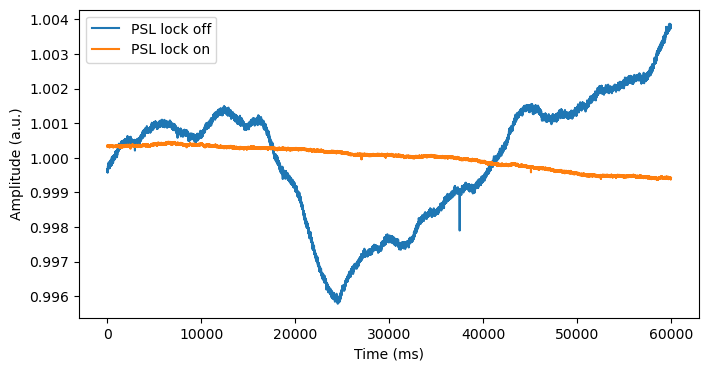

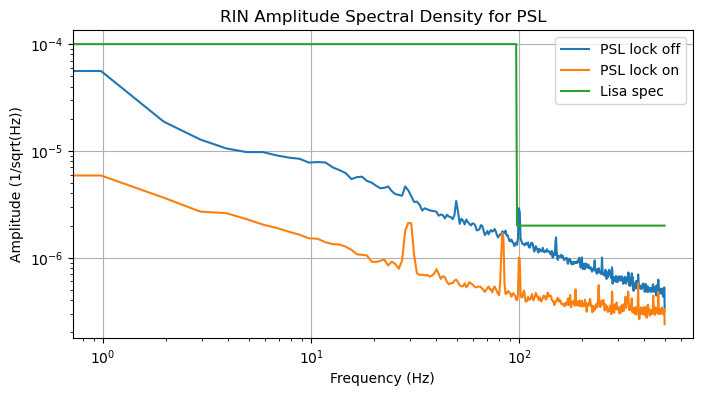

In [ ]:

import numpy as np
from scipy.signal import welch
import matplotlib.pyplot as plt

signal = np.fromfile('C:/Users/hodei/Documents/RINbin_data/mephistopsl_rin60locked.bin', dtype='float32')
n = 100
sampl_freq = 1e5/n # Sampling frequency in Hz
trimmedlen = len(signal)//n*n
points_matrix = signal[:trimmedlen].reshape(-1,n)
mpoints = points_matrix.mean(axis=1)
points_norm = mpoints/np.mean(mpoints)

# Compute average voltage
V_avg = np.mean(mpoints)

# Compute PSD using Welch's method
frequencies, psd = welch(mpoints, fs=sampl_freq, nperseg=1024)

# Normalize PSD by square of average voltage to get RIN in 1/Hz
rin = psd / (V_avg ** 2)

# Convert to amplitude spectral density (ASD) in 1/sqrt(Hz)
asd = np.sqrt(rin)
lasd1 = np.full((len(frequencies[:100]), 1), 1e-4)
lasd2 = np.full((len(frequencies[100:]), 1), 2e-6)
lasd = np.append(lasd1,lasd2)
#np.savetxt('C:/Users/hodei/Documents/RINbin_data/welchauasd.csv', uasd, delimiter=',') 

# --- OUTPUT ---
print(f"Average voltage: {V_avg:.3f} V")
print("First 10 frequency bins and ASD values:")
for f, a in zip(frequencies[:10], asd[:10]):
    print(f"{f:.2f} Hz -> {a:.3e} 1/sqrt(Hz)")

plt.figure(1,figsize=(8,4))
plt.plot(upoints_norm, label='PSL lock off')
plt.plot(points_norm, label='PSL lock on')
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude (a.u.)")
plt.legend()
plt.show()

# Plot ASD vs frequency
plt.figure(figsize=(8,4))
plt.loglog(ufrequencies, uasd, label='PSL lock off')
plt.loglog(frequencies, asd, label='PSL lock on')
plt.loglog(frequencies, lasd, label='Spec')
plt.legend()
plt.title("RIN Amplitude Spectral Density for PSL")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (1/sqrt(Hz))")
plt.grid(True)
plt.show()